# Лабораторная работа №7 (Линейная регрессия)
## Выполнил Неженский Михаил Сергеевич, 6133-010402D

In [1]:
import numpy as np
import pandas as pd

#### 0.0. Найти и загрузить датасет, подгодящий для регрессии

Используемый в работе набор данных: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [2]:
boston = 'data/boston.csv'
data = pd.read_csv(boston)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### 0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [3]:
data_new = data.dropna(how='any',axis=0) 
data_new = data_new.drop(columns='CHAS', axis=1)
data_new

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### 0.5. Визуализировать heatmap-матрицу кореллированности признаков.

In [4]:
import seaborn as sns

<Axes: >

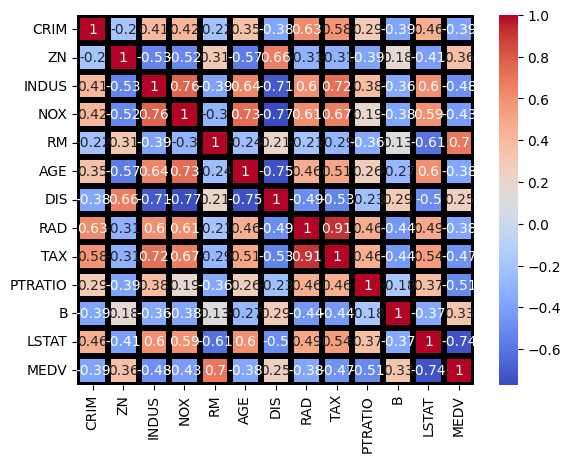

In [5]:
sns.heatmap(data_new.corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black')

#### 0.6. Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

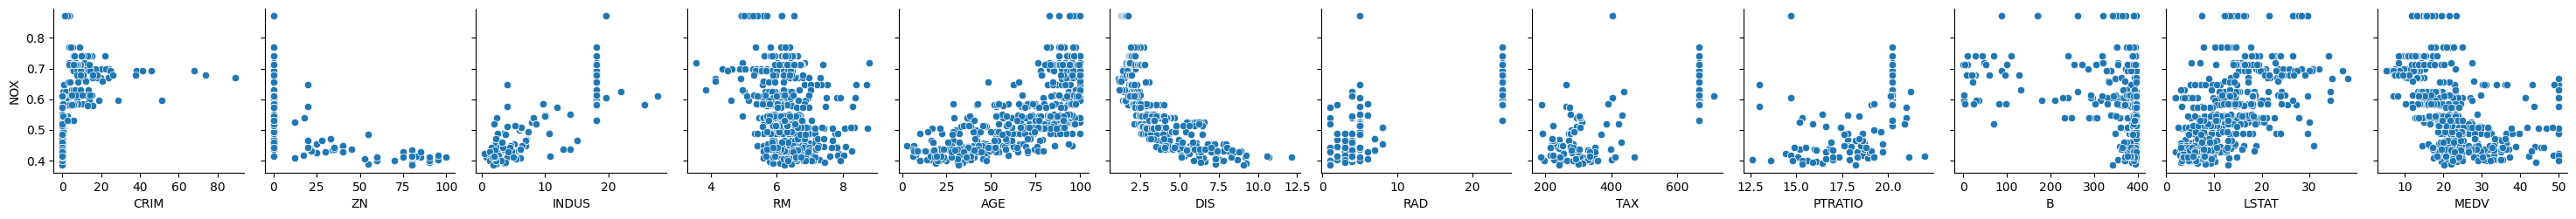

In [6]:
sns.pairplot(data_new,
             y_vars=['NOX'],
             x_vars=['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

#### 0.8. Разделить на обучающую и тестовую выборки

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data_new.drop('NOX', axis = 1)
Y = data_new.NOX
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

### 1. Опробовать линейную регрессию

In [10]:
from sklearn.linear_model import LinearRegression

#### 1.1. Обучить модель линейной регрессии (LinearRegression)

In [11]:
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

#### 1.2. Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
def metrics(pred_model, Y_data):
    mae = mean_absolute_error(Y_data, pred_model)
    mse = mean_squared_error(Y_data, pred_model)
    r2 = r2_score(Y_data, pred_model)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('R2: ', r2)

In [14]:
print('метрики на обущающем наборе')
metrics(pred_train, Y_train)

метрики на обущающем наборе
MAE:  0.04140318071420847
MSE:  0.002965935972627312
R2:  0.7894641107281827


In [15]:
print('метрики на тестовом наборе')
metrics(pred_test, Y_test)

метрики на тестовом наборе
MAE:  0.043387357963672234
MSE:  0.0030045714718825414
R2:  0.734794922774058


#### 1.3. Вывести model.coef_ и model.intercept_

In [19]:
def intercept_coef(model):
    importance = model_regress.coef_
    print('coef: ', importance)
    intercept = model_regress.intercept_
    print('intercept: ', intercept)

In [20]:
intercept_coef(model_regress)

coef:  [-7.18299279e-04 -2.62672312e-05  4.42307511e-03  7.15884649e-04
  9.65205164e-04 -1.70589850e-02  2.64173152e-03  3.52646021e-05
 -1.41328104e-02 -6.80684745e-05 -4.11084545e-04 -2.58314647e-03]
intercept:  0.8150084054056326


#### 1.4. Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же как мы строили графики для feature_importance в теме с деревьями)
(желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

In [21]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')

    importance attribute
5    -0.017059       DIS
8    -0.014133   PTRATIO
11   -0.002583      MEDV
0    -0.000718      CRIM
10   -0.000411     LSTAT
9    -0.000068         B
1    -0.000026        ZN
7     0.000035       TAX
3     0.000716        RM
4     0.000965       AGE
6     0.002642       RAD
2     0.004423     INDUS


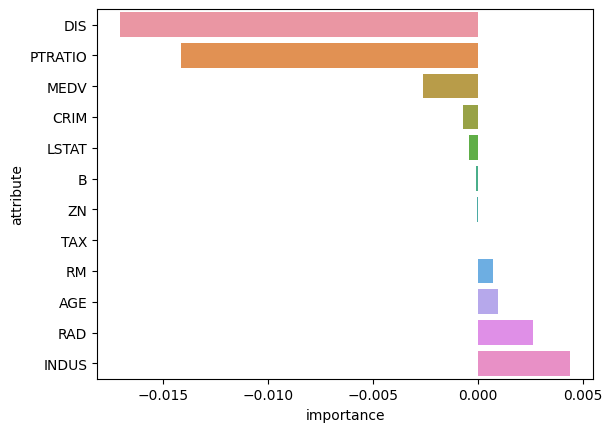

In [22]:
barh_plot(model_regress, X_train)

### 2. Опробовать регрессию Lasso

In [23]:
from sklearn.linear_model import Lasso

#### 2.1. Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model_lasso = Lasso()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_lasso = GridSearchCV(model_lasso, parametrs, refit = True)
model_lasso.fit(X_train, Y_train)

print(model_lasso.best_params_)

{'alpha': 0.01}


In [26]:
# обучение модели
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

#### 2.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [27]:
print('метрики на обущающем наборе')
metrics(pred_lasso_train, Y_train)

метрики на обущающем наборе
MAE:  0.04148198021058087
MSE:  0.003099955758323526
R2:  0.7799507648495202


In [28]:
print('метрики на тестовом наборе')
metrics(pred_lasso_test, Y_test)

метрики на тестовом наборе
MAE:  0.04379747026150644
MSE:  0.0031107379196842265
R2:  0.7254239088868735


#### 2.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [29]:
intercept_coef(model_lasso)

coef:  [-7.18299279e-04 -2.62672312e-05  4.42307511e-03  7.15884649e-04
  9.65205164e-04 -1.70589850e-02  2.64173152e-03  3.52646021e-05
 -1.41328104e-02 -6.80684745e-05 -4.11084545e-04 -2.58314647e-03]
intercept:  0.8150084054056326


#### 2.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

    importance attribute
8    -0.010615   PTRATIO
5    -0.009960       DIS
11   -0.001390      MEDV
1    -0.000219        ZN
0    -0.000103      CRIM
9    -0.000083         B
3    -0.000000        RM
10    0.000000     LSTAT
7     0.000114       TAX
6     0.000913       RAD
4     0.001228       AGE
2     0.004329     INDUS


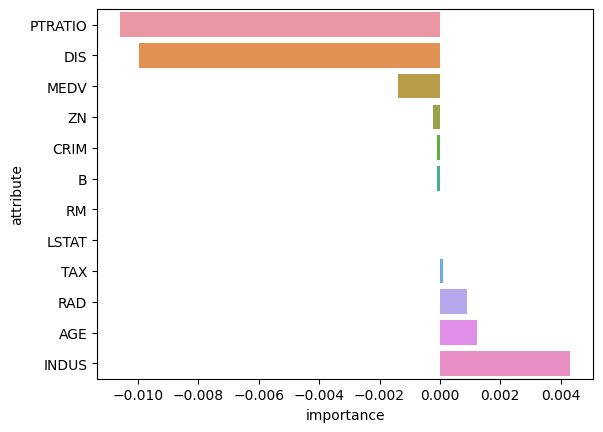

In [30]:
barh_plot(model_lasso, X_train)

### 3. Опробовать регрессию Ridge

In [31]:
from sklearn.linear_model import Ridge

#### 3.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [33]:
model_ridge = Ridge()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_ridge = GridSearchCV(model_ridge, parametrs, refit = True)
model_ridge.fit(X_train, Y_train)

print(model_ridge.best_params_)

{'alpha': 28.820000000000004}


In [34]:
# обучение модели
model_ridge = Ridge(alpha = 28.82)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

#### 3.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [35]:
print('метрики на обущающем наборе')
metrics(pred_ridge_train, Y_train)

метрики на обущающем наборе
MAE:  0.041306860017239024
MSE:  0.0029674533481862447
R2:  0.789356400374484


In [36]:
print('метрики на тестовом наборе')
metrics(pred_ridge_test, Y_test)

метрики на тестовом наборе
MAE:  0.04336117142350478
MSE:  0.003003354809706806
R2:  0.7349023141239703


#### 3.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [37]:
intercept_coef(model_ridge)

coef:  [-7.18299279e-04 -2.62672312e-05  4.42307511e-03  7.15884649e-04
  9.65205164e-04 -1.70589850e-02  2.64173152e-03  3.52646021e-05
 -1.41328104e-02 -6.80684745e-05 -4.11084545e-04 -2.58314647e-03]
intercept:  0.8150084054056326


#### 3.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

    importance attribute
5    -0.016086       DIS
8    -0.013839   PTRATIO
11   -0.002465      MEDV
0    -0.000689      CRIM
10   -0.000360     LSTAT
9    -0.000070         B
1    -0.000048        ZN
7     0.000037       TAX
3     0.000531        RM
4     0.000998       AGE
6     0.002591       RAD
2     0.004487     INDUS


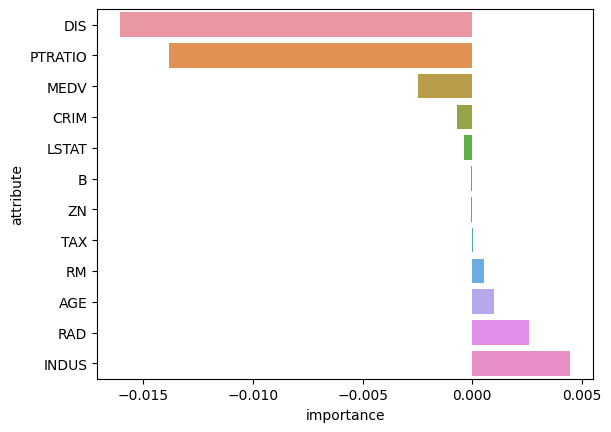

In [38]:
barh_plot(model_ridge, X_train)

### 4. Опробовать регрессию ElasticNet

In [41]:
from sklearn.linear_model import ElasticNet

#### 4.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [43]:
model_elastic = ElasticNet()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 1, 0.01), "l1_ratio": np.arange(0.01, 1, 0.01)}

model_elastic = GridSearchCV(model_elastic, parametrs, refit = True)
model_elastic.fit(X_train, Y_train)

print(model_elastic.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.15000000000000002}


In [44]:
# обучение модели
model_elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.15)
model_elastic.fit(X_train, Y_train)
pred_elastic_train = model_elastic.predict(X_train)
pred_elastic_test = model_elastic.predict(X_test)

#### 4.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [45]:
print('метрики на обущающем наборе')
metrics(pred_elastic_train, Y_train)

метрики на обущающем наборе
MAE:  0.04125921958787087
MSE:  0.002970181732293
R2:  0.7891627270182511


In [46]:
print('метрики на тестовом наборе')
metrics(pred_elastic_test, Y_test)

метрики на тестовом наборе
MAE:  0.04328608441424499
MSE:  0.0030008830118392156
R2:  0.7351204927729045


#### 4.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [47]:
intercept_coef(model_elastic)

coef:  [-7.18299279e-04 -2.62672312e-05  4.42307511e-03  7.15884649e-04
  9.65205164e-04 -1.70589850e-02  2.64173152e-03  3.52646021e-05
 -1.41328104e-02 -6.80684745e-05 -4.11084545e-04 -2.58314647e-03]
intercept:  0.8150084054056326


#### 4.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

    importance attribute
5    -0.015825       DIS
8    -0.013545   PTRATIO
11   -0.002302      MEDV
0    -0.000631      CRIM
10   -0.000219     LSTAT
9    -0.000071         B
1    -0.000060        ZN
3     0.000000        RM
7     0.000048       TAX
4     0.001003       AGE
6     0.002374       RAD
2     0.004385     INDUS


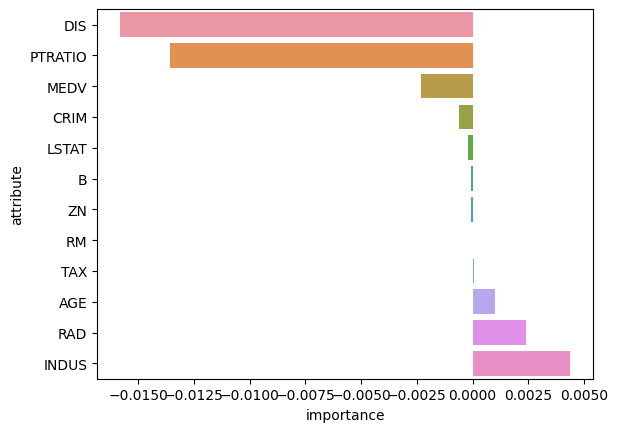

In [48]:
barh_plot(model_elastic, X_train)

### 5.0. Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

Лучшей моделью является модель регрессии (ElasticNet)

In [50]:
model_best = ElasticNet(alpha = 0.01, l1_ratio = 0.15)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

In [51]:
print('метрики на тестовом наборе')
metrics(pred_best_test, Y_test)

метрики на тестовом наборе
MAE:  0.04328608441424499
MSE:  0.0030008830118392156
R2:  0.7351204927729045


#### 5.1. Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True )

In [57]:
from pandas import get_dummies

In [58]:
data = data.dropna(how='any',axis=0) 
data_full = get_dummies(data, drop_first = True)

data_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [59]:
X = data_full.drop('NOX', axis = 1)
Y = data_full.NOX
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [61]:
model_best = ElasticNet(alpha = 0.01, l1_ratio = 0.15)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

#### 5.2. Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [62]:
print('метрики на тестовом наборе')
metrics(pred_best_test, Y_test)

метрики на тестовом наборе
MAE:  0.04328609645867905
MSE:  0.0030008844734690466
R2:  0.7351203637589483


#### 5.3. Прогоняем наш датасет (X), который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)
X_new_test = scaler.fit_transform(X_test)

In [65]:
model_scaler = ElasticNet(alpha = 0.01, l1_ratio = 0.15)
model_scaler.fit(X_new_train, Y_train)
pred_scaler_test = model_scaler.predict(X_new_test)

print('метрики на тестовом наборе')
metrics(pred_scaler_test, Y_test)

метрики на тестовом наборе
MAE:  0.042463615124943455
MSE:  0.002880752387873977
R2:  0.7457240852332763


Значение R2 действительно стало выше, а MAE и MSE ниже

#### 5.4. Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [66]:
X_scaler = pd.DataFrame(X_new_train, columns = X_train.columns)
X_scaler.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.414467,-0.502076,-0.131550,-0.248243,-0.545992,0.882706,-0.697220,-0.414312,0.151801,-0.263649,0.418526,0.468504,-0.403855
1,-0.411506,-0.502076,-0.345570,-0.248243,0.589482,0.425926,-0.500557,-0.529012,-0.133632,1.104554,0.416368,-0.450215,0.519671
2,-0.258046,-0.502076,1.280976,-0.248243,1.652420,0.808918,-0.874466,-0.529012,-0.020648,-1.631851,0.185494,-1.490709,2.908100
3,-0.404642,-0.502076,2.485387,-0.248243,-1.689836,1.061904,-0.943187,-0.643712,1.810878,0.751469,-0.450460,2.291060,-1.539686
4,-0.425181,3.351527,-1.392050,-0.248243,0.935425,-1.843918,1.758747,-0.758412,-0.026595,-0.616733,0.440670,-1.107796,1.305199


    importance attribute
6    -0.035269       DIS
9    -0.026458   PTRATIO
12   -0.018486      MEDV
10   -0.005270         B
0    -0.000879      CRIM
1    -0.000000        ZN
4    -0.000000        RM
11    0.000000     LSTAT
3     0.002858      CHAS
8     0.008809       TAX
7     0.015845       RAD
5     0.026907       AGE
2     0.028919     INDUS


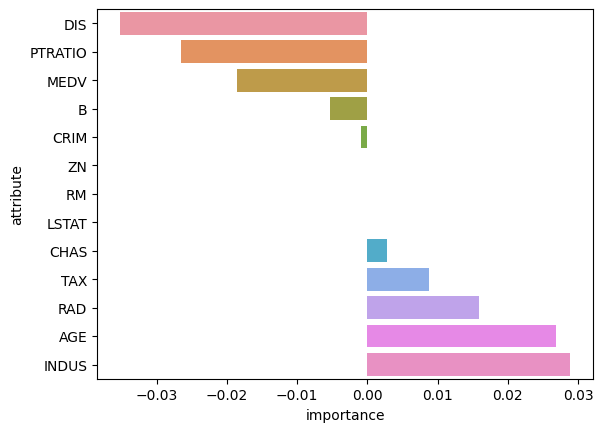

In [67]:
barh_plot(model_scaler, X_scaler)